## Predicting Survival on the Titanic

### History
Perhaps one of the most infamous shipwrecks in history, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 people on board. Interestingly, by analysing the probability of survival based on few attributes like gender, age, and social status, we can make very accurate predictions on which passengers would survive. Some groups of people were more likely to survive than others, such as women, children, and the upper-class. Therefore, we can learn about the society priorities and privileges at the time.

### Assignment:

Build a Machine Learning Pipeline, to engineer the features in the data set and predict who is more likely to Survive the catastrophe.

Follow the Jupyter notebook below, and complete the missing bits of code, to achieve each one of the pipeline steps.

In [333]:
import re

# to handle datasets
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import StandardScaler

# to build the models
from sklearn.linear_model import LogisticRegression

# to evaluate the models
from sklearn.metrics import accuracy_score, roc_auc_score

# to persist the model and the scaler
import joblib

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

## Prepare the data set

In [348]:
# load the data - it is available open source and online

data = pd.read_csv('https://www.openml.org/data/get_csv/16826755/phpMYEkMl')

# display data
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [349]:
# replace interrogation marks by NaN values

data = data.replace('?', np.nan)

In [350]:
# retain only the first cabin if more than
# 1 are available per passenger

def get_first_cabin(row):
    try:
        return row.split()[0]
    except:
        return np.nan
    
data['cabin'] = data['cabin'].apply(get_first_cabin)

In [353]:
# extracts the title (Mr, Ms, etc) from the name variable

def get_title(passenger):
    line = passenger
    if re.search('Mrs', line):
        return 'Mrs'
    elif re.search('Mr', line):
        return 'Mr'
    elif re.search('Miss', line):
        return 'Miss'
    elif re.search('Master', line):
        return 'Master'
    else:
        return 'Other'
    
data['title'] = data['name'].apply(get_title)

In [354]:
# cast numerical variables as floats

data['fare'] = data['fare'].astype('float')
data['age'] = data['age'].astype('float')

In [355]:
# drop unnecessary variables

data.drop(labels=['name','ticket', 'boat', 'body','home.dest'], axis=1, inplace=True)

# display data
data.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,title
0,1,1,female,29.0000,0,0,211.3375,B5,S,Miss
1,1,1,male,0.9167,1,2,151.5500,C22,S,Master
2,1,0,female,2.0000,1,2,151.5500,C22,S,Miss
3,1,0,male,30.0000,1,2,151.5500,C22,S,Mr
4,1,0,female,25.0000,1,2,151.5500,C22,S,Mrs


In [356]:
# save the data set

data.to_csv('titanic.csv', index=False)

## Data Exploration

### Find numerical and categorical variables

In [357]:
target = 'survived'

In [358]:
vars_num = [var for var in data.columns if data[var].dtype !='O' and var != target]

vars_cat = [var for var in data.columns if data[var].dtype == 'O']

print('Number of numerical variables: {}'.format(len(vars_num)))
print('Number of categorical variables: {}'.format(len(vars_cat)))

Number of numerical variables: 5
Number of categorical variables: 4


### Find missing values in variables

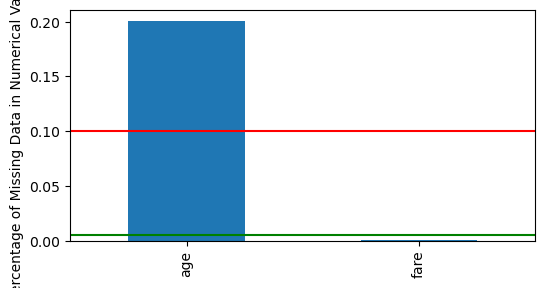

In [ ]:
# first in numerical variables
vars_num_with_na = [var for var in vars_num if data[var].isnull().sum() > 0]
data[vars_num_with_na].isnull().mean().sort_values(ascending=False).plot.bar(figsize=(6,3))
plt.ylabel('Percentage of Missing Data in Numerical Variables')
plt.axhline(y=0.10, color = 'r', linestyle='-')
plt.axhline(y=0.005, color='g', linestyle= '-')
plt.show()

In [360]:
data[vars_num_with_na].isnull().mean()

age     0.200917
fare    0.000764
dtype: float64

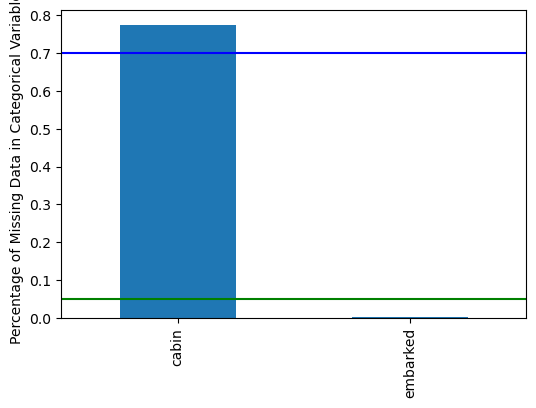

In [361]:
# now in categorical variables

vars_cat_with_na = [var for var in vars_cat if data[var].isnull().sum() > 0]
data[vars_cat_with_na].isnull().mean().sort_values(ascending=False).plot.bar(figsize=(6,4))
plt.ylabel('Percentage of Missing Data in Categorical Variables')
plt.axhline(y=0.70, color='b', linestyle='-')
plt.axhline(y=0.05, color='g', linestyle='-')
plt.show()



In [362]:
data[vars_cat_with_na].isnull().mean()

cabin       0.774637
embarked    0.001528
dtype: float64

### Determine cardinality of categorical variables

<Axes: >

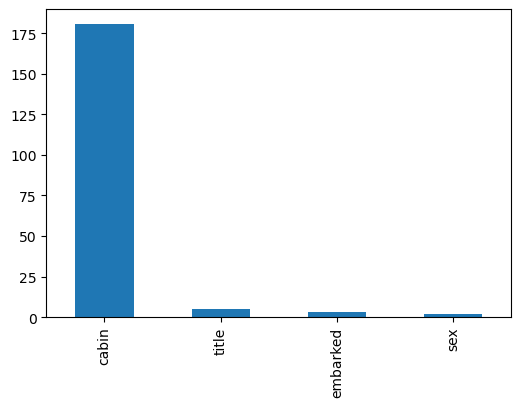

In [293]:
data[vars_cat].nunique().sort_values(ascending=False).plot.bar(figsize=(6,4))

In [363]:
data[vars_cat].nunique()

sex           2
cabin       181
embarked      3
title         5
dtype: int64

### Determine the distribution of numerical variables

Number of discrete variable : 3


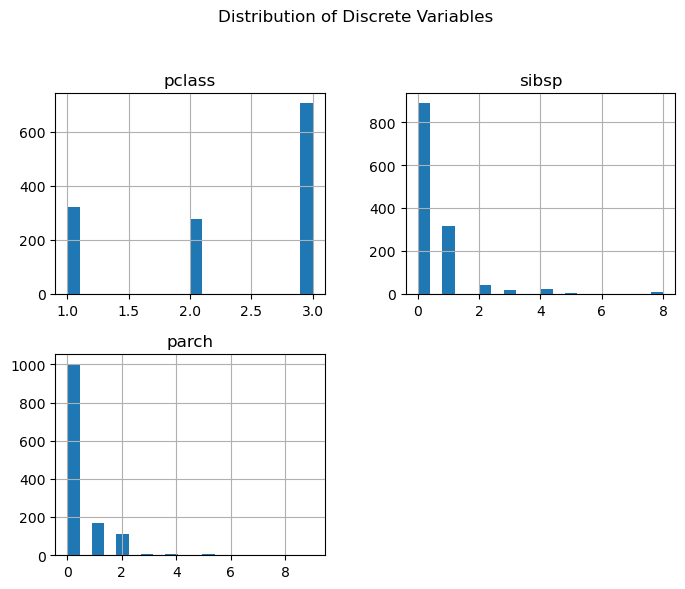

In [367]:
discrete_vars = [var for var in vars_num if data[var].dtype == 'int64']
print('Number of discrete variable :', len(discrete_vars))

import pandas as pd
import matplotlib.pyplot as plt

# Plot histograms for each column
data[discrete_vars].hist(column=['pclass', 'sibsp', 'parch'], bins=20, figsize=(8, 6))
plt.suptitle('Distribution of Discrete Variables', y=1.02)
plt.show()

Number of continuous variable : 2


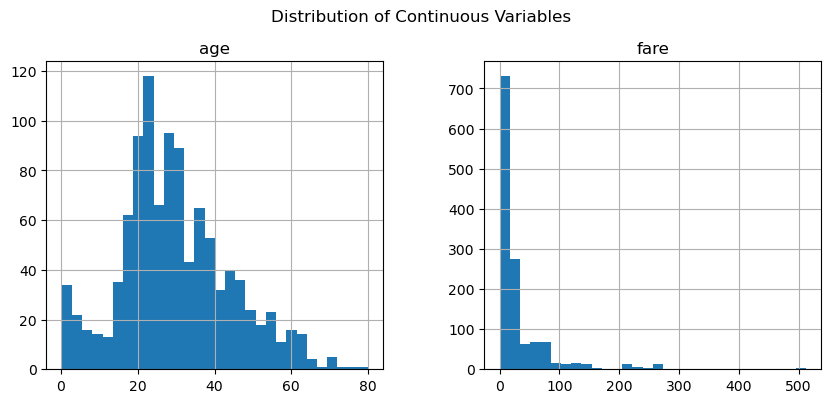

In [369]:
continuous_vars = [var for var in vars_num if data[var].dtype == 'float64']
print('Number of continuous variable :', len(continuous_vars))

# Plot histograms for each column
data[continuous_vars].hist(column=['age', 'fare'], bins=30, figsize=(10, 4))
plt.suptitle('Distribution of Continuous Variables', y=1.01)
plt.show()

## Separate data into train and test

Use the code below for reproducibility. Don't change it.

In [371]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('survived', axis=1),  # predictors
    data['survived'],  # target
    test_size=0.2,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((1047, 9), (262, 9))

## Feature Engineering
### Extract only the letter (and drop the number) from the variable Cabin

In [374]:
X_train['cabin'] = X_train['cabin'].str[0]
X_test['cabin'] = X_test['cabin'].str[0]
X_train['cabin'].unique()

array([nan, 'E', 'F', 'A', 'C', 'D', 'B', 'T', 'G'], dtype=object)

### Fill in Missing data in numerical variables:
- Add a binary missing indicator
- Fill NA in original variable with the median

In [375]:
vars_num_with_na

['age', 'fare']

In [ ]:
def binary_missing_indicator(df, vars):
    for var in vars:
        df[var + '_na'] = np.where(df[var].isnull(),1,0)

binary_missing_indicator(X_train, vars_num_with_na)
binary_missing_indicator(X_test, vars_num_with_na)


,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,title,pclass_missing,age_missing,sibsp_missing,parch_missing,fare_missing
0,1,1,female,29.0000,0,0,211.3375,B,S,Miss,0,0,0,0,0
1,1,1,male,0.9167,1,2,151.5500,C,S,Master,0,0,0,0,0
2,1,0,female,2.0000,1,2,151.5500,C,S,Miss,0,0,0,0,0
3,1,0,male,30.0000,1,2,151.5500,C,S,Mr,0,0,0,0,0
4,1,0,female,25.0000,1,2,151.5500,C,S,Mrs,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,female,14.5000,1,0,14.4542,NaN,C,Miss,0,0,0,0,0
1305,3,0,female,NaN,1,0,14.4542,NaN,C,Miss,0,1,0,0,0
1306,3,0,male,26.5000,0,0,7.2250,NaN,C,Mr,0,0,0,0,0
1307,3,0,male,27.0000,0,0,7.2250,NaN,C,Mr,0,0,0,0,0


In [ ]:
def fillna_with_median(df, vars):
    for var in vars:
        df[var].fillna(df[var].median(), inplace=True)
fillna_with_median(X_train, vars_num_with_na)
fillna_with_median(X_test, vars_num_with_na)

C:\Users\mm025\AppData\Local\Temp\ipykernel_14444\3045268246.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[var].fillna(df[var].median(), inplace=True)


### Replace Missing data in categorical variables with the string **Missing**

In [300]:
vars_cat

['sex', 'cabin', 'embarked', 'title']

In [301]:
def fillna_with_string(df, vars):
    for var in vars:
        df[var] = df[var].fillna('Missing')

fillna_with_string(data, vars_cat)
data

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,title,pclass_missing,age_missing,sibsp_missing,parch_missing,fare_missing
0,1,1,female,29.0000,0,0,211.3375,B,S,Miss,0,0,0,0,0
1,1,1,male,0.9167,1,2,151.5500,C,S,Master,0,0,0,0,0
2,1,0,female,2.0000,1,2,151.5500,C,S,Miss,0,0,0,0,0
3,1,0,male,30.0000,1,2,151.5500,C,S,Mr,0,0,0,0,0
4,1,0,female,25.0000,1,2,151.5500,C,S,Mrs,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,female,14.5000,1,0,14.4542,Missing,C,Miss,0,0,0,0,0
1305,3,0,female,28.0000,1,0,14.4542,Missing,C,Miss,0,1,0,0,0
1306,3,0,male,26.5000,0,0,7.2250,Missing,C,Mr,0,0,0,0,0
1307,3,0,male,27.0000,0,0,7.2250,Missing,C,Mr,0,0,0,0,0


### Remove rare labels in categorical variables

- remove labels present in less than 5 % of the passengers

In [ ]:
def remove_rare_labels(df, vars, rare_perc=0.05):

    df = df.copy()

    # Calculate the percentage of observations per category
    for var in vars:
        freq = df[var].value_counts(normalize=True)
        # Identify categories that are rare (appear in < rare_perc of the data)
        rare_labels = freq[freq < rare_perc].index
        df_filtered = df[~df[var].isin(rare_labels)]

    return df_filtered



In [ ]:
df_filtered= remove_rare_labels(data, vars_cat, 0.05)


,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,title,pclass_missing,age_missing,sibsp_missing,parch_missing,fare_missing
2,1,0,female,2.0,1,2,151.5500,C,S,Miss,0,0,0,0,0
3,1,0,male,30.0,1,2,151.5500,C,S,Mr,0,0,0,0,0
4,1,0,female,25.0,1,2,151.5500,C,S,Mrs,0,0,0,0,0
8,1,1,female,53.0,2,0,51.4792,C,S,Mrs,0,0,0,0,0
9,1,0,male,71.0,0,0,49.5042,Missing,C,Mr,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,female,14.5,1,0,14.4542,Missing,C,Miss,0,0,0,0,0
1305,3,0,female,28.0,1,0,14.4542,Missing,C,Miss,0,1,0,0,0
1306,3,0,male,26.5,0,0,7.2250,Missing,C,Mr,0,0,0,0,0
1307,3,0,male,27.0,0,0,7.2250,Missing,C,Mr,0,0,0,0,0


### Perform one hot encoding of categorical variables into k-1 binary variables

- k-1, means that if the variable contains 9 different categories, we create 8 different binary variables
- Remember to drop the original categorical variable (the one with the strings) after the encoding

In [331]:
def one_hot_encode_k_minus_1(df, vars):
    df = df.copy()
    
    for var in vars:
        # Create k-1 dummy variables and drop the first category
        dummies = pd.get_dummies(df[var], prefix=var, drop_first=True)
        print(dummies)
        
        # Concatenate the dummy variables to the original dataframe
        df_dummy = pd.concat([df, dummies], axis=1)
        print (df)
        
        # Drop the original categorical variable
        df_dummy.drop(columns=var, inplace=True)
    
    return df_dummy


In [332]:
df_encoded = one_hot_encode_k_minus_1(df_filtered, vars_cat)

      sex_male
2        False
3         True
4        False
8        False
9         True
...        ...
1304     False
1305     False
1306      True
1307      True
1308      True

[1033 rows x 1 columns]
      pclass  survived     sex   age  sibsp  parch      fare    cabin  \
2          1         0  female   2.0      1      2  151.5500        C   
3          1         0    male  30.0      1      2  151.5500        C   
4          1         0  female  25.0      1      2  151.5500        C   
8          1         1  female  53.0      2      0   51.4792        C   
9          1         0    male  71.0      0      0   49.5042  Missing   
...      ...       ...     ...   ...    ...    ...       ...      ...   
1304       3         0  female  14.5      1      0   14.4542  Missing   
1305       3         0  female  28.0      1      0   14.4542  Missing   
1306       3         0    male  26.5      0      0    7.2250  Missing   
1307       3         0    male  27.0      0      0    7.2250  Mis

### Scale the variables

- Use the standard scaler from Scikit-learn

## Train the Logistic Regression model

- Set the regularization parameter to 0.0005
- Set the seed to 0

## Make predictions and evaluate model performance

Determine:
- roc-auc
- accuracy

**Important, remember that to determine the accuracy, you need the outcome 0, 1, referring to survived or not. But to determine the roc-auc you need the probability of survival.**

That's it! Well done

**Keep this code safe, as we will use this notebook later on, to build production code, in our next assignement!!**